## Analysis of the impact of average weight with high speed for animals

### we want to perform a linear regression to analyze the relationship between the variables weight and highspeed taking into account the covariable movement type.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("animal_speeds.csv")

# take a look at the dataset
df.head()

,animal,weight,movement_type,highspeed
0,House sparrow,0.04,flying,46.0
1,Pelican,7.80,flying,65.0
2,Vulture,11.00,flying,88.0
3,Pigeon,0.35,flying,80.0
4,Puffin,0.58,flying,88.0


In [3]:
# summarize the data
df.describe()

,weight,highspeed
count,159.000000,159.000000
mean,1994.115969,52.640881
std,12285.311105,34.460258
min,0.001000,1.500000
25%,2.625000,30.000000
50%,22.000000,48.000000
75%,310.000000,70.000000
max,140000.000000,195.000000


In [4]:
cdf = df[['animal','weight','movement_type','highspeed']]
cdf.head(9)

,animal,weight,movement_type,highspeed
0,House sparrow,0.040,flying,46.0
1,Pelican,7.800,flying,65.0
2,Vulture,11.000,flying,88.0
3,Pigeon,0.350,flying,80.0
4,Puffin,0.580,flying,88.0
5,Barn Owl,0.500,flying,80.0
6,Magpie,0.230,flying,32.0
7,Hummingbird,0.012,flying,48.0
8,Robin,0.019,flying,30.0


### We can plot each of these features:

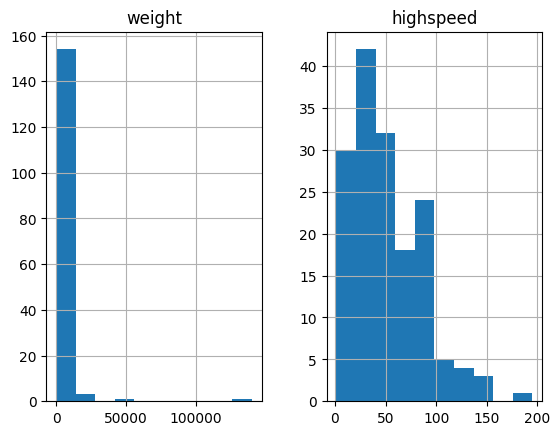

In [5]:
viz = cdf[['weight','highspeed']]
viz.hist()
plt.show()

#### So we know that we have 4 movement_type
Now, let's plot each of these features against the highspeed, to see how linear their relationship is:

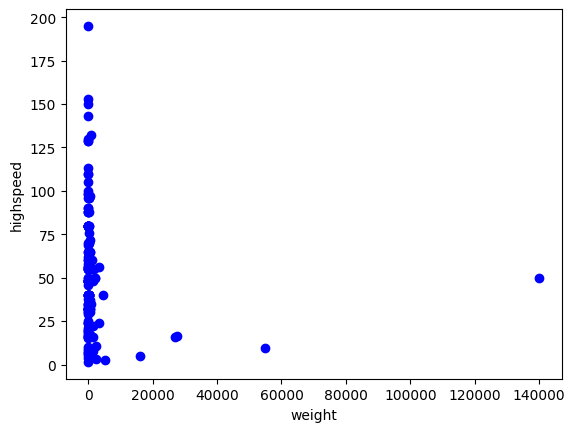

In [9]:
plt.scatter(cdf.weight,cdf.highspeed,  color='blue')
plt.xlabel("weight")
plt.ylabel("highspeed")
plt.show()

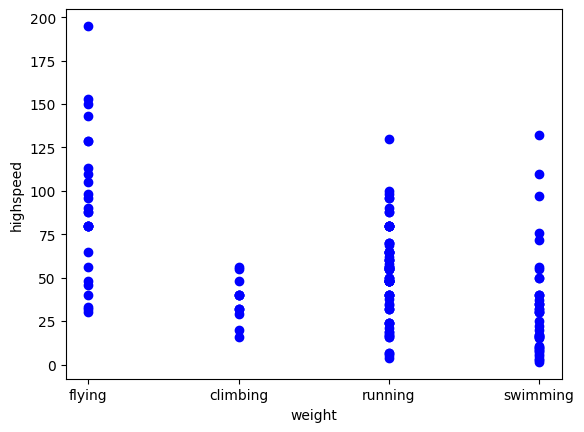

In [10]:
plt.scatter(cdf.movement_type, cdf.highspeed,  color='blue')
plt.xlabel("weight")
plt.ylabel("highspeed")
plt.show()

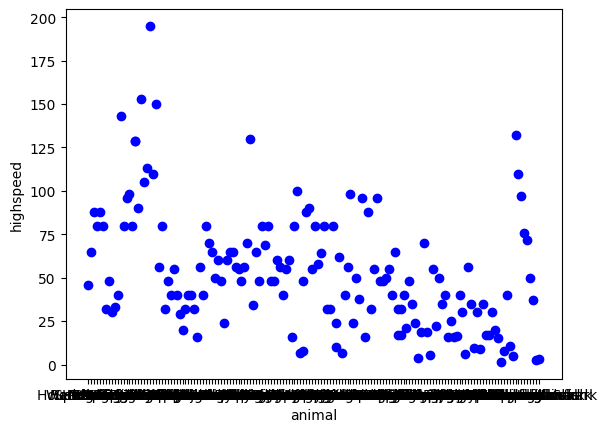

In [11]:
plt.scatter(cdf.animal, cdf.highspeed,  color='blue')
plt.xlabel("animal")
plt.ylabel("highspeed")
plt.show()

In [12]:
df['movement_type'].unique()

array(['flying', 'climbing', 'running', 'swimming'], dtype=object)

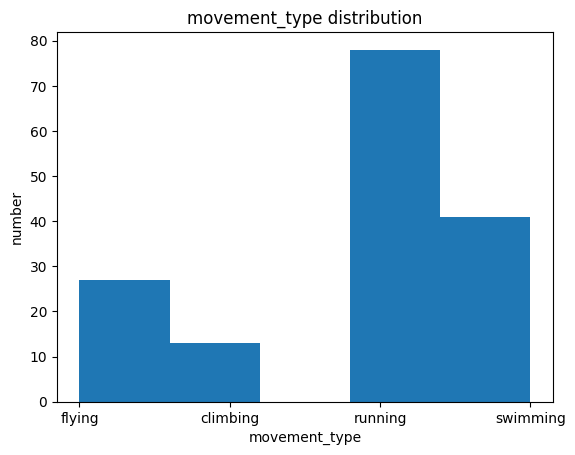

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['movement_type'], bins = 5,)
plt.title('movement_type distribution')
plt.xlabel('movement_type')
plt.ylabel('number')
plt.show()

### Now, let's plot each of these features against each movement_type, to see how linear their relationship is:

In [14]:
df1=pd.DataFrame(df)
df1=df[df['movement_type']=='flying']
df1

,animal,weight,movement_type,highspeed
0,House sparrow,0.040,flying,46.0
1,Pelican,7.800,flying,65.0
2,Vulture,11.000,flying,88.0
3,Pigeon,0.350,flying,80.0
4,Puffin,0.580,flying,88.0
5,Barn Owl,0.500,flying,80.0
6,Magpie,0.230,flying,32.0
7,Hummingbird,0.012,flying,48.0
8,Robin,0.019,flying,30.0
9,Great tit,0.018,flying,33.0


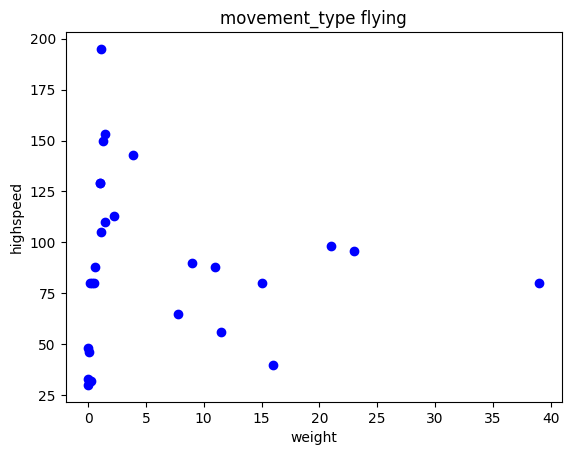

In [15]:
ypoints = df1 ['highspeed']
xpoints = df1 ['weight']
plt.title('movement_type flying')
plt.xlabel('weight')
plt.ylabel('highspeed')
plt.scatter(xpoints, ypoints, color='blue')
plt.show()

In [16]:
cdf1 = df1[['animal','weight','movement_type','highspeed']]
cdf1.head(9)

,animal,weight,movement_type,highspeed
0,House sparrow,0.040,flying,46.0
1,Pelican,7.800,flying,65.0
2,Vulture,11.000,flying,88.0
3,Pigeon,0.350,flying,80.0
4,Puffin,0.580,flying,88.0
5,Barn Owl,0.500,flying,80.0
6,Magpie,0.230,flying,32.0
7,Hummingbird,0.012,flying,48.0
8,Robin,0.019,flying,30.0


## Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which,we train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model.Therefore, it gives us a better understanding of how well our model generalizes on new data.
This means that we know the outcome of each data point in the testing dataset, making it great to test with! Sincethis data has not been used to train the model, the model has no knowledge of the outcome of these data points.So, in essence, it is truly an out-of-sample testing.
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% fortesting. We create a mask to select random rows using np.random.rand() function:

In [19]:
msk1 = np.random.rand(len(df1)) < 0.8
train1 = cdf1[msk1]
test1 = cdf1[~msk1]

## Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

### Train data distribution

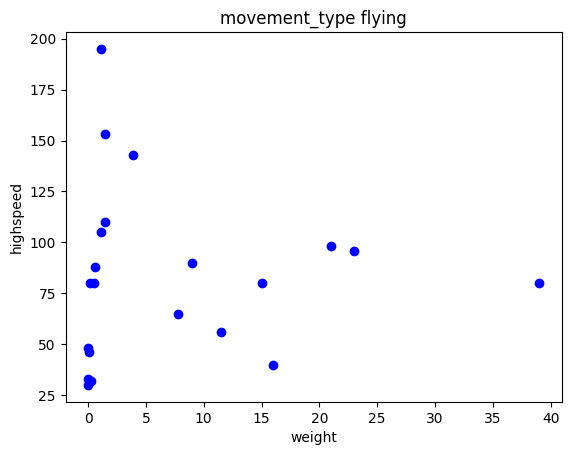

In [24]:
plt.scatter(train1.weight, train1.highspeed,  color='blue')
plt.title('movement_type flying')
plt.xlabel("weight")
plt.ylabel("highspeed")
plt.show()

### Modeling

Using sklearn package to model data.


In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train1_x = np.asanyarray(train1[['weight']])
train1_y = np.asanyarray(train1[['highspeed']])
regr.fit (train1_x, train1_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.06877968]]
Intercept:  [83.73920109]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

### Plot outputs

We can plot the fit line over the data:

Text(0, 0.5, 'highspeed')

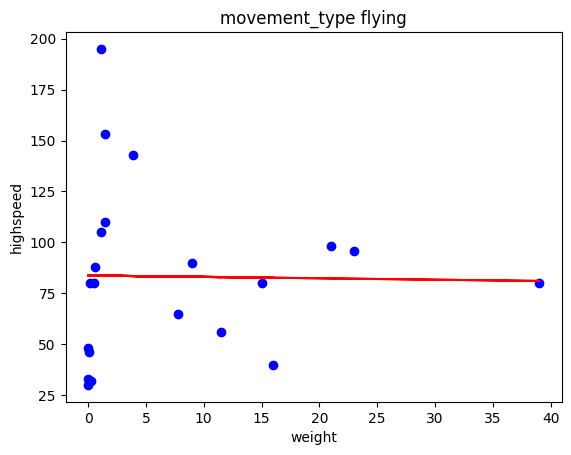

In [26]:
plt.scatter(train1.weight, train1.highspeed,  color='blue')
plt.plot(train1_x, regr.coef_[0][0]*train1_x + regr.intercept_[0], '-r')
plt.title('movement_type flying')
plt.xlabel("weight")
plt.ylabel("highspeed")

### Evaluation

#### We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [27]:
from sklearn.metrics import r2_score

test1_x = np.asanyarray(test1[['weight']])
test1_y = np.asanyarray(test1[['highspeed']])
test1_y_ = regr.predict(test1_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test1_y_ - test1_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test1_y_ - test1_y) ** 2))
print("R2-score: %.2f" % r2_score(test1_y , test1_y_) )

Mean absolute error: 32.53
Residual sum of squares (MSE): 1569.32
R2-score: -1.63


In [31]:
df2=pd.DataFrame(df)
df2=df[df['movement_type']=='climbing']
df2

,animal,weight,movement_type,highspeed
27,Aye-Aye,2.500,climbing,32.0
28,Baboon,14.000,climbing,48.0
29,Chimpanzee,45.000,climbing,40.0
30,Gibbon,8.000,climbing,55.0
31,Gorilla,190.000,climbing,40.0
32,Howler Monkey,10.000,climbing,29.0
33,Kinkajou,3.000,climbing,20.0
34,Lemur,2.200,climbing,32.0
35,Mandrill,20.000,climbing,40.0
36,Mountain Gorilla,150.000,climbing,40.0


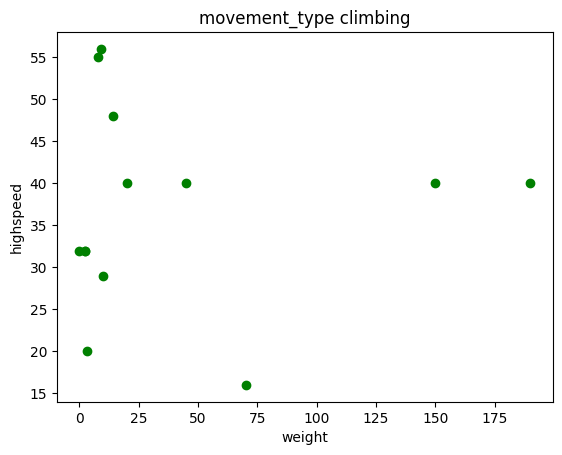

In [38]:
ypoints = df2 ['highspeed']
xpoints = df2 ['weight']
plt.title('movement_type climbing')
plt.xlabel('weight')
plt.ylabel('highspeed')
plt.scatter(xpoints, ypoints, color='green')
plt.show()

In [33]:
cdf2 = df2[['animal','weight','movement_type','highspeed']]
cdf2.head(9)

,animal,weight,movement_type,highspeed
27,Aye-Aye,2.5,climbing,32.0
28,Baboon,14.0,climbing,48.0
29,Chimpanzee,45.0,climbing,40.0
30,Gibbon,8.0,climbing,55.0
31,Gorilla,190.0,climbing,40.0
32,Howler Monkey,10.0,climbing,29.0
33,Kinkajou,3.0,climbing,20.0
34,Lemur,2.2,climbing,32.0
35,Mandrill,20.0,climbing,40.0


In [36]:
msk2 = np.random.rand(len(df2)) < 0.8
train2 = cdf2[msk2]
test2 = cdf2[~msk2]

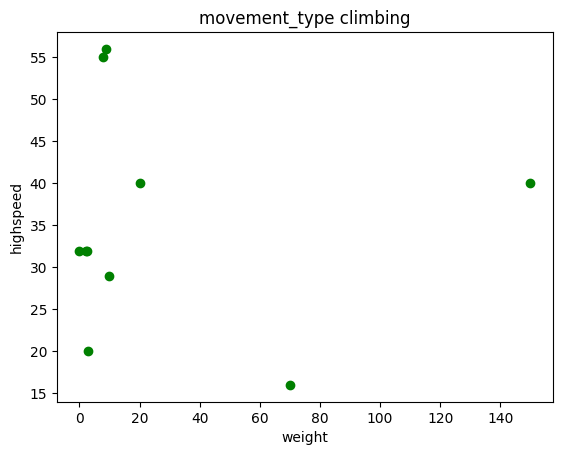

In [46]:
plt.scatter(train2.weight, train2.highspeed,  color='green')
plt.title('movement_type climbing')
plt.xlabel("weight")
plt.ylabel("highspeed")
plt.show()

In [47]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train2_x = np.asanyarray(train2[['weight']])
train2_y = np.asanyarray(train2[['highspeed']])
regr.fit (train2_x, train2_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.01486714]]
Intercept:  [35.60840781]


Text(0, 0.5, 'highspeed')

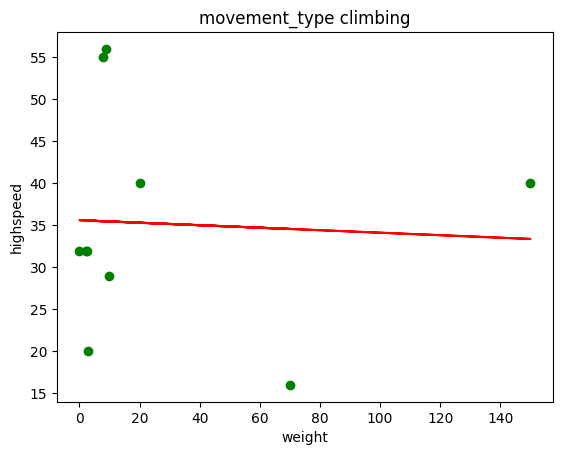

In [49]:
plt.scatter(train2.weight, train2.highspeed,  color='green')
plt.plot(train2_x, regr.coef_[0][0]*train2_x + regr.intercept_[0], '-r')
plt.title('movement_type climbing')
plt.xlabel("weight")
plt.ylabel("highspeed")

In [50]:
from sklearn.metrics import r2_score

test2_x = np.asanyarray(test2[['weight']])
test2_y = np.asanyarray(test2[['highspeed']])
test2_y_ = regr.predict(test2_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test2_y_ - test2_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test2_y_ - test2_y) ** 2))
print("R2-score: %.2f" % r2_score(test2_y , test2_y_) )

Mean absolute error: 8.29
Residual sum of squares (MSE): 78.81
R2-score: -4.54


In [51]:
df3=pd.DataFrame(df)
df3=df[df['movement_type']=='running']
df3

,animal,weight,movement_type,highspeed
40,African Elephant,4500.000,running,40.0
41,African Lion,160.000,running,80.0
42,African Wild Dog,22.000,running,70.0
43,Arabian Camel,450.000,running,65.0
44,Arctic Fox,5.400,running,50.0
...,...,...,...,...
113,Rattlesnake,4.500,running,4.0
114,Kiwi,2.300,running,19.0
115,Ostrich,160.000,running,70.0
116,Scorpion,0.055,running,19.0


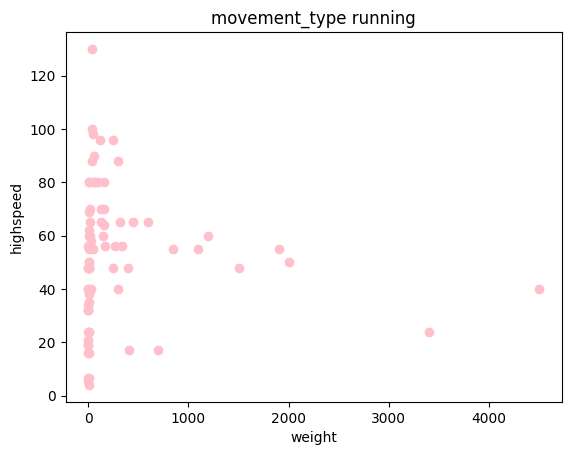

In [55]:
ypoints = df3 ['highspeed']
xpoints = df3 ['weight']
plt.title('movement_type running')
plt.xlabel('weight')
plt.ylabel('highspeed')
plt.scatter(xpoints, ypoints, color='pink')
plt.show()

In [56]:
cdf3 = df3[['animal','weight','movement_type','highspeed']]
cdf3.head(9)

,animal,weight,movement_type,highspeed
40,African Elephant,4500.0,running,40.0
41,African Lion,160.0,running,80.0
42,African Wild Dog,22.0,running,70.0
43,Arabian Camel,450.0,running,65.0
44,Arctic Fox,5.4,running,50.0
45,Arctic Hare,5.0,running,60.0
46,Armadillo,4.5,running,48.0
47,Asian Elephant,3400.0,running,24.0
48,Asian Lion,150.0,running,60.0


In [57]:
msk3 = np.random.rand(len(df3)) < 0.8
train3 = cdf3[msk3]
test3 = cdf3[~msk3]

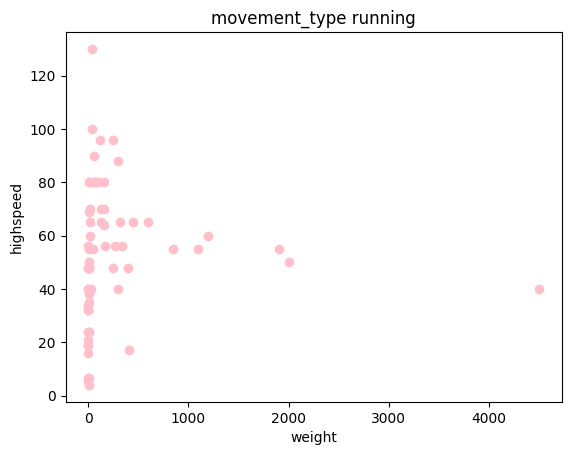

In [58]:
plt.scatter(train3.weight, train3.highspeed,  color='pink')
plt.title('movement_type running')
plt.xlabel("weight")
plt.ylabel("highspeed")
plt.show()

In [59]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train3_x = np.asanyarray(train3[['weight']])
train3_y = np.asanyarray(train3[['highspeed']])
regr.fit (train3_x, train3_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00037423]]
Intercept:  [52.41138642]


Text(0, 0.5, 'highspeed')

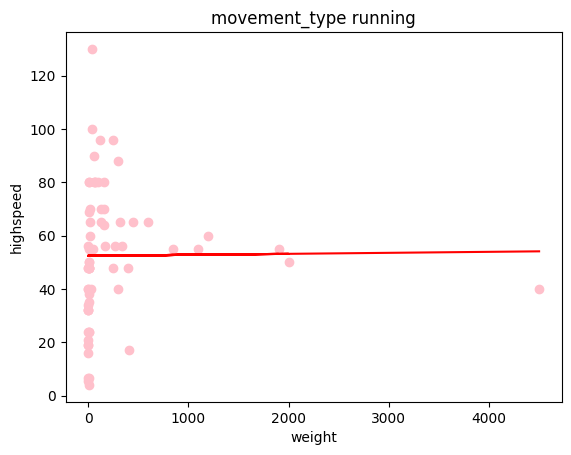

In [61]:
plt.scatter(train3.weight, train3.highspeed,  color='pink')
plt.plot(train3_x, regr.coef_[0][0]*train3_x + regr.intercept_[0], '-r')
plt.title('movement_type running')
plt.xlabel("weight")
plt.ylabel("highspeed")

In [62]:
from sklearn.metrics import r2_score

test3_x = np.asanyarray(test3[['weight']])
test3_y = np.asanyarray(test3[['highspeed']])
test3_y_ = regr.predict(test3_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test3_y_ - test3_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test3_y_ - test3_y) ** 2))
print("R2-score: %.2f" % r2_score(test3_y , test3_y_) )

Mean absolute error: 21.82
Residual sum of squares (MSE): 708.37
R2-score: -0.01


In [63]:
df4=pd.DataFrame(df)
df4=df[df['movement_type']=='swimming']
df4

,animal,weight,movement_type,highspeed
118,Beaver,22.000,swimming,55.0
119,Beluga Whale,1400.000,swimming,22.0
120,Blue Whale,140000.000,swimming,50.0
121,Bottlenose Doplhin,400.000,swimming,35.0
122,California Sea Lion,200.000,swimming,40.0
123,Elephant Seal,1360.000,swimming,16.0
124,Fur Seal,55.000,swimming,25.0
125,Gray Whale,27000.000,swimming,16.0
126,Hippopotamus,1500.000,swimming,8.0
127,Humpback Whale,27500.000,swimming,16.5


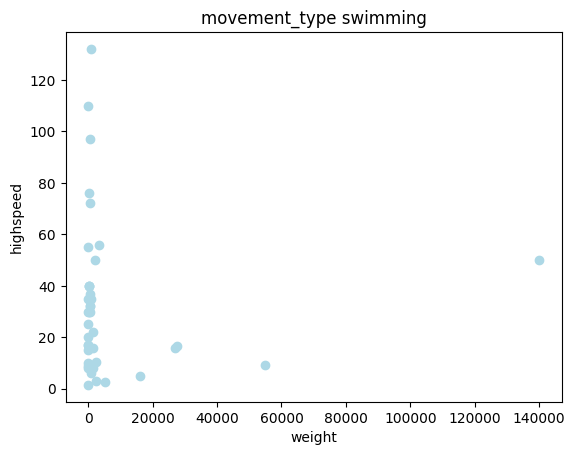

In [64]:
ypoints = df4 ['highspeed']
xpoints = df4 ['weight']
plt.title('movement_type swimming')
plt.xlabel('weight')
plt.ylabel('highspeed')
plt.scatter(xpoints, ypoints, color='lightblue')
plt.show()

In [65]:
cdf4 = df4[['animal','weight','movement_type','highspeed']]
cdf4.head(9)

,animal,weight,movement_type,highspeed
118,Beaver,22.0,swimming,55.0
119,Beluga Whale,1400.0,swimming,22.0
120,Blue Whale,140000.0,swimming,50.0
121,Bottlenose Doplhin,400.0,swimming,35.0
122,California Sea Lion,200.0,swimming,40.0
123,Elephant Seal,1360.0,swimming,16.0
124,Fur Seal,55.0,swimming,25.0
125,Gray Whale,27000.0,swimming,16.0
126,Hippopotamus,1500.0,swimming,8.0


In [67]:
msk4 = np.random.rand(len(df4)) < 0.8
train4 = cdf4[msk4]
test4 = cdf4[~msk4]

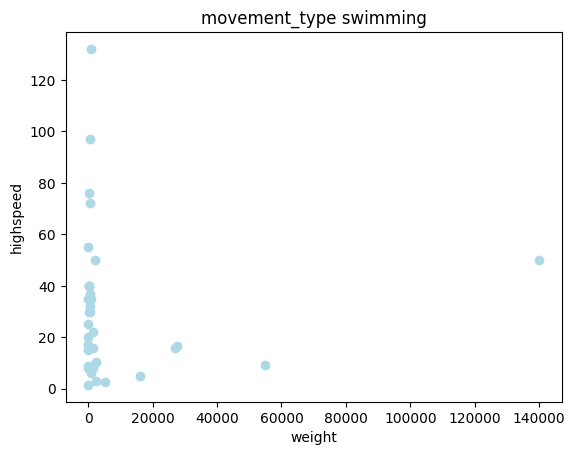

In [68]:
plt.scatter(train4.weight, train4.highspeed,  color='lightblue')
plt.title('movement_type swimming')
plt.xlabel("weight")
plt.ylabel("highspeed")
plt.show()

In [69]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train4_x = np.asanyarray(train4[['weight']])
train4_y = np.asanyarray(train4[['highspeed']])
regr.fit (train4_x, train4_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[6.8142734e-06]]
Intercept:  [30.75810835]


Text(0, 0.5, 'highspeed')

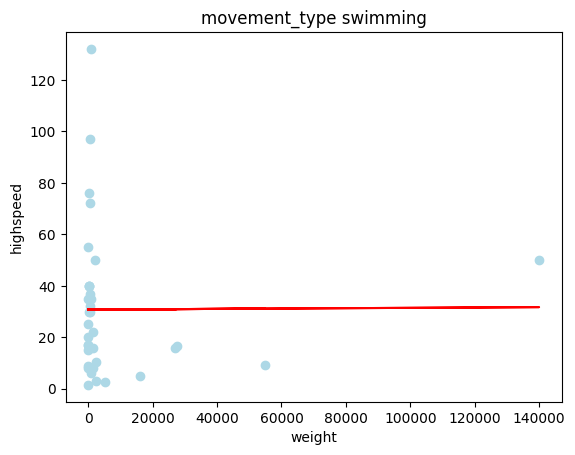

In [70]:
plt.scatter(train4.weight, train4.highspeed,  color='lightblue')
plt.plot(train4_x, regr.coef_[0][0]*train4_x + regr.intercept_[0], '-r')
plt.title('movement_type swimming')
plt.xlabel("weight")
plt.ylabel("highspeed")

In [71]:
from sklearn.metrics import r2_score

test4_x = np.asanyarray(test4[['weight']])
test4_y = np.asanyarray(test4[['highspeed']])
test4_y_ = regr.predict(test4_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test4_y_ - test4_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test4_y_ - test4_y) ** 2))
print("R2-score: %.2f" % r2_score(test4_y , test4_y_) )

Mean absolute error: 21.91
Residual sum of squares (MSE): 1227.68
R2-score: -0.21


In [74]:
df_running = df[df['movement_type'] == 'running']
df_swimming = df[df['movement_type'] == 'swimming']
df_flying = df[df['movement_type'] == 'flying']
df_climbing = df[df['movement_type'] == 'climbing']

# polynomial
run_fit = np.polyfit(df_running.highspeed, df_running.weight, 1)
swim_fit = np.polyfit(df_swimming.highspeed, df_swimming.weight, 1)
fly_fit = np.polyfit(df_flying.highspeed, df_flying.weight, 1)
climb_fit = np.polyfit(df_climbing.highspeed, df_climbing.weight, 1)
print(run_fit)
print(swim_fit)
print(fly_fit)
print(climb_fit)

[ -2.31764338 417.49902019]
[ -11.00190739 7516.60053255]
[-0.02355144  8.4164396 ]
[ 0.05830771 38.13210008]


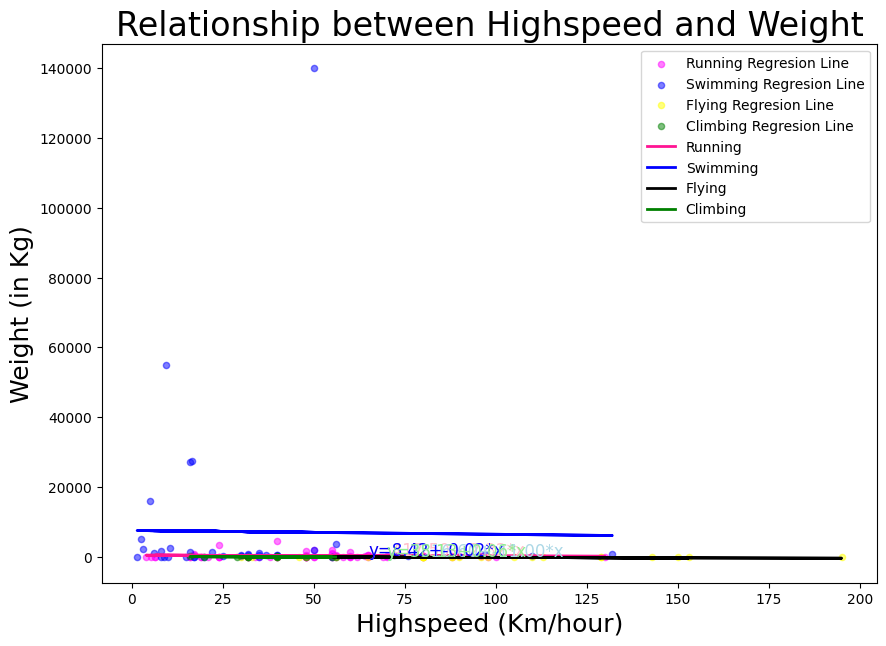

In [81]:
# scatter plots and regression lines

df_running = df[df['movement_type'] == 'running']
df_swimming = df[df['movement_type'] == 'swimming']
df_flying = df[df['movement_type'] == 'flying']
df_climbing = df[df['movement_type'] == 'climbing']

# Scatter plots.
ax1 = df_running.plot(kind='scatter', x='highspeed', y='weight', color='magenta', alpha=0.5, figsize=(10, 7))
df_swimming.plot(kind='scatter', x='highspeed', y='weight', color='blue', alpha=0.5, figsize=(10, 7), ax=ax1)
df_flying.plot(kind='scatter', x='highspeed', y='weight', color='yellow', alpha=0.5, figsize=(10, 7), ax=ax1)
df_climbing.plot(kind='scatter', x='highspeed', y='weight', color='green', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_running.highspeed, run_fit[0] * df_running.highspeed + run_fit[1], color='deeppink', linewidth=2)
plt.plot(df_swimming.highspeed, swim_fit[0] * df_swimming.highspeed + swim_fit[1], color='blue', linewidth=2)
plt.plot(df_flying.highspeed, run_fit[0] * df_flying.highspeed + fly_fit[1], color='black', linewidth=2)
plt.plot(df_climbing.highspeed, run_fit[0] * df_climbing.highspeed + climb_fit[1], color='green', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(run_fit[1], run_fit[0]), color='pink', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(swim_fit[1], swim_fit[0]), color='lightblue', size=12)
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(fly_fit[1], fly_fit[0]), color='blue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(climb_fit[1], climb_fit[0]), color='lightgreen', size=12)

# legend, title and labels.
plt.legend(labels=['Running Regresion Line', 'Swimming Regresion Line', 'Flying Regresion Line', 'Climbing Regresion Line','Running', 'Swimming','Flying','Climbing'])
plt.title('Relationship between Highspeed and Weight', size=24)
plt.xlabel('Highspeed (Km/hour)',size=18)
plt.ylabel('Weight (in Kg)',size=18);

### This scatterplot clearly shows that the coefficients have a negative linear relationship with eachother, If weight increases highspeed decreases and vice versa.